思路：
已知数据只有12分钟-15分钟，数据较少
首先将每个点添加59个点，变成以秒为间隔的数据
然后将已知数据分为训练集和测试集
通过以训练集训练出来的模型来预测测试集，并使用计算效果最好的超参数作为hw的最终参数
然后用它来预测

In [5]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
from numpy import ndarray
# single exponential smoothing
from statsmodels.tsa.seasonal import seasonal_decompose
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# 1、读取数据，数据预处理

In [6]:
def ts2datetime(timestamp) -> datetime.datetime:
    """10位时间戳转datetime
    Args:
        timestamp: 时间戳，整数部分必须是10位，如1621582366或1621582366.300
    Returns:
        datetime: 对应的datetime格式
    """
    timestamp = int(timestamp) if isinstance(timestamp, float) else timestamp
    return datetime.datetime.fromtimestamp(timestamp)

def _interval_to_freq(interval: float) -> str:
    """时间间隔转freq"""
    if interval < 60:
        return '1min'
    if interval % 60 != 0:
        raise ValueError('Unsupported interval')
    return '{}min'.format(int(interval / 60))

def resample(data: ndarray, interval: float) -> ndarray:
    """按照给定的采样间隔对数据进行重采样
    Args:
        data: 时间序列[[t1,v1],[t2,v2],...]
        interval: 重采样间隔(秒)
    Returns:
        重采样后的数组
    """
    data = pd.DataFrame(data)
    data.columns = ['timestamp', 'value']
    data['datetime'] = data['timestamp'].map(ts2datetime)
    data.index = data['datetime']
    data_reindex = data.reindex(
        pd.date_range(start=data['datetime'].min(), end=data['datetime'].max(), freq=_interval_to_freq(interval)))
    data_reindex = data_reindex[['value']]
    result = data_reindex.interpolate(method='linear')
    result = result.reset_index()
    result['timestamp'] = result['index'].map(datetime.datetime.timestamp)
    return result[['timestamp', 'value']].to_numpy()

In [8]:
file='/Users/chenxilin/Code/Work/rs_algo/data/case1/data/by18cftp1ap2001_CPUCpuUtil_I1647894.txt'
with open(file) as f:
    original_data = f.read()
    data = pd.DataFrame(original_data['data']['values'])
    data.columns=['timestamp', 'value']
    data['timestamp'] = data['timestamp'] / 1000
    data = pd.DataFrame(resample(data, interval=60))
    data.columns=['timestamp', 'value']
    data['datetime'] = data['timestamp'].map(ts2datetime)
    data = data.set_index('datetime')[['value']]
data.head()

TypeError: string indices must be integers

从2021-02-19 10:32:00开始预测

<AxesSubplot:xlabel='datetime'>

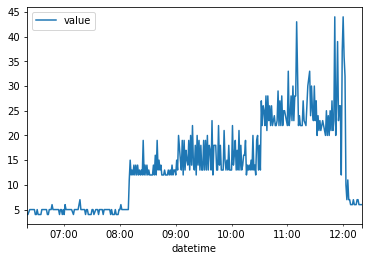

In [20]:
data.loc['2021-02-19 6:20:00':'2021-02-19 12:20:00'].plot()

In [4]:
origin_train = data.loc['2021-02-19 10:17:00':'2021-02-19 10:31:00'].copy()
origin_test = data.loc['2021-02-19 10:32:00':'2021-02-19 11:32:00'].copy()

NameError: name 'data' is not defined

In [28]:
origin_train.head()

,value
datetime,
2021-02-19 10:17:00,14.0
2021-02-19 10:18:00,13.0
2021-02-19 10:19:00,14.0
2021-02-19 10:20:00,13.0
2021-02-19 10:21:00,15.0


In [2]:
freq = '1s'  # 新的时间间隔设为1秒
index = origin_train.index
data_reindex = origin_train.reindex(pd.date_range(start=index.min(), end=index.max(), freq=freq)
data_reindex = data_reindex[['value']]
data_reindex=data_reindex.interpolate(method='linear')
data_reindex


SyntaxError: invalid syntax (<ipython-input-2-cf035f5d1afc>, line 4)

In [3]:
freq = '1s'  # 新的时间间隔设为1秒
index = origin_train.index
index

NameError: name 'origin_train' is not defined

In [ ]:
origin_train

origin_train.